In [32]:
import pandas as pd

In [33]:
import numpy as np

In [34]:
f=pd.read_csv('mov.csv')
f

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


### 2.drop 

In [42]:
columns_to_drop = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime']
columns_present = f.columns.intersection(columns_to_drop)
f = f.drop(columns=columns_present)
print(f.head())


   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

           director                                     genres  \
0   Colin Trevorrow  Action|Adventure|Science Fiction|Thriller   
1     George Miller  Action|Adventure|Science Fiction|Thriller   
2  Robert Schwentke         Adventure|Science Fiction|Thriller   
3       J.J. Abrams   Action|Adventure|Science Fiction|Fantasy   
4         James Wan                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015        5562   
1  Village Roadshow 

 ### 3.Find what are the films without genres? then drop the rows of films without genres

In [44]:
missing_genres = f[f['genres'].isnull()]
print(missing_genres)


Empty DataFrame
Columns: [popularity, budget, revenue, original_title, director, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []


In [46]:
f.dropna(subset=['genres'], inplace=True)
print(f.isnull().sum())



popularity                 0
budget                     0
revenue                    0
original_title             0
director                  42
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### 4. Find out which genres are the mostpopular year to year?

In [49]:
grouped = f.groupby(['release_year', 'genres']).size().reset_index(name='count')

In [50]:
most_popular = grouped.sort_values(['release_year', 'count'], ascending=[True, False]).drop_duplicates(subset='release_year')
print(most_popular)

      release_year                          genres  count
19            1960                          Horror      3
37            1961                           Drama      3
64            1962                           Drama      4
101           1963                          Horror      3
121           1964                  Comedy|Romance      5
146           1965  Action|Adventure|Drama|Western      2
186           1966                  Action|Western      3
228           1967            Comedy|Drama|Romance      4
263           1968                           Drama      4
297           1969                           Drama      5
327           1970                          Horror      4
356           1971                           Drama      4
389           1972                          Comedy      4
431           1973                     Crime|Drama      3
473           1974          Comedy|Science Fiction      3
508           1975                          Comedy      3
570           

### 5. In the year 2012, what is thedifference between a Comedy Movie and a Family Movie? Make a bar graph t### to showthe difference

In [56]:
f_2012 = f[f['release_year'] == 2012]

In [58]:
import matplotlib.pyplot as plt

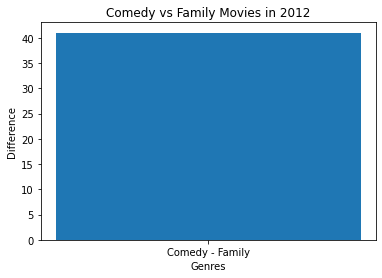

In [60]:
grouped = f_2012.groupby(['genres']).size().reset_index(name='count')
comedy = grouped[grouped['genres'] == 'Comedy']['count'].iloc[0]
family = grouped[grouped['genres'] == 'Family']['count'].iloc[0]
difference = comedy - family
plt.bar(['Comedy - Family'], [difference])
plt.xlabel('Genres')
plt.ylabel('Difference')
plt.title('Comedy vs Family Movies in 2012')
plt.show()

### 6..Run the plot for the genre-popularityrelationship in 2015.


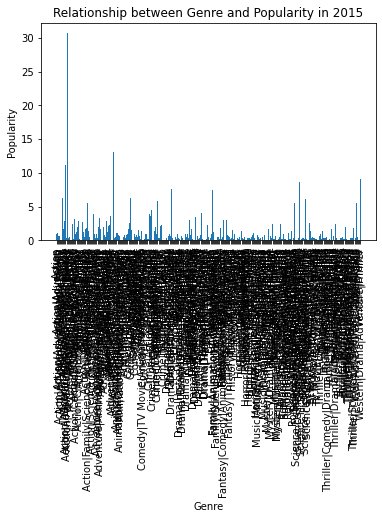

In [65]:
f = f[f['release_year'] == 2015]
grouped = f.groupby('genres').mean()['popularity']
plt.bar(grouped.index, grouped.values)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Relationship between Genre and Popularity in 2015')
plt.xticks(rotation=90)
plt.show()

#### 7. Look up which films have the highest budget. Also a list of the top ten high-budget films.


In [67]:

top_ten = f.head(10)
print("Top Ten Highest Budget Films:")
for index, row in top_ten.iterrows():
    print("{0}. {1} - ${2:,}".format(index + 1, row["genres"], row["budget"]))

Top Ten Highest Budget Films:
1. Action|Adventure|Science Fiction|Thriller - $150,000,000
2. Action|Adventure|Science Fiction|Thriller - $150,000,000
3. Adventure|Science Fiction|Thriller - $110,000,000
4. Action|Adventure|Science Fiction|Fantasy - $200,000,000
5. Action|Crime|Thriller - $190,000,000
6. Western|Drama|Adventure|Thriller - $135,000,000
7. Science Fiction|Action|Thriller|Adventure - $155,000,000
8. Drama|Adventure|Science Fiction - $108,000,000
9. Family|Animation|Adventure|Comedy - $74,000,000
10. Comedy|Animation|Family - $175,000,000


In [22]:
maxClm = f['budget'].max()
print(maxClm)
 

425000000


### 8. Let's find how revenue relates to theaverage vote score.

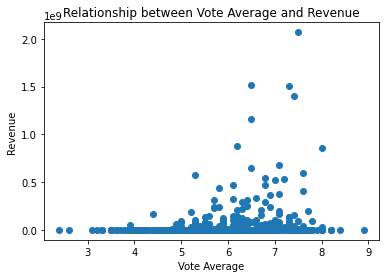

The correlation coefficient between vote average and revenue is: 0.18785806946205966


In [69]:
plt.scatter(f["vote_average"], f["revenue"])
plt.xlabel("Vote Average")
plt.ylabel("Revenue")
plt.title("Relationship between Vote Average and Revenue")
plt.show()


correlation = f["vote_average"].corr(f["revenue"])

print("The correlation coefficient between vote average and revenue is:", correlation)